In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [117]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [118]:
data = pd.read_csv('freezerdata.csv', index_col=0)

In [119]:
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')

In [120]:
data.head()

,Battery port_1,Door switch,Energie meter (kwh / pulse),Environment,Hot gas pipe,Liquid pipe,Refrigerated space (1),Refrigerated space (2),Suction pipe
Date,,,,,,,,,
2023-03-14 23:00:29,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-14 23:00:41,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-14 23:01:01,NaN,NaN,NaN,19.9,NaN,18.3,19.2,18.9,19.0
2023-03-14 23:01:02,NaN,NaN,NaN,NaN,18.9,NaN,NaN,NaN,NaN
2023-03-14 23:01:29,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


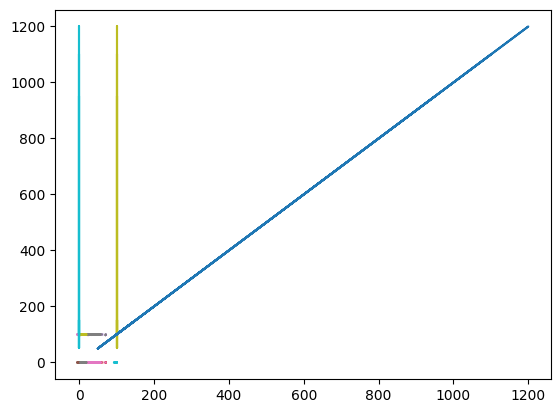

In [121]:
for i in data.columns:
    data = data.dropna(subset=[i])
    plt.plot(data, data[i], label=i)
plt.show()